In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [8]:
from google.colab import files

uploaded = files.upload()

Saving houseDataset.csv to houseDataset.csv


In [9]:
import pandas as pd

# Replace with your uploaded filename
df = pd.read_csv("houseDataset.csv")

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [10]:
print(df.columns.tolist())

['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']


In [11]:
# Select the relevant columns
df = df[['sqft_living', 'bedrooms', 'city', 'price']]

# One-hot encode the city (location)
df = pd.get_dummies(df, columns=['city'], drop_first=True)

# Drop any missing values
df = df.dropna()

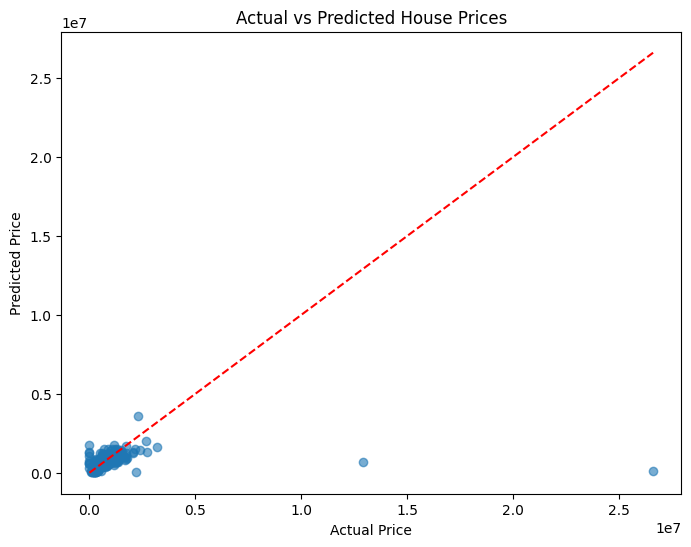

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()




In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

import pandas as pd

# Combine actual and predicted prices
results = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

# Show first 10 rows
print(results.head(10))

Mean Absolute Error (MAE): 179991.32
Root Mean Squared Error (RMSE): 990230.49
   Actual Price  Predicted Price
0  5.440000e+05    474252.494074
1  0.000000e+00    268251.678802
2  1.712500e+06    891913.643295
3  3.650000e+05    427718.738319
4  2.750000e+05    217503.007265
5  6.250000e+05    679490.723891
6  4.530000e+05    676886.306342
7  3.000000e+05    302133.452951
8  4.179857e+05    576241.579763
9  6.725000e+05    843478.623560


In [19]:
# Step 1: Create an empty row with zero values
import numpy as np
input_data = np.zeros(X.shape[1])  # Same number of features as model expects

# Step 2: Create a DataFrame with correct columns
new_input = pd.DataFrame([input_data], columns=X.columns)

# Step 3: Set your desired values
new_input['sqft_living'] = 2000
new_input['bedrooms'] = 3

# Step 4: Set correct city
city_column = 'city_Seattle'  # Replace with actual one-hot column name
if city_column in new_input.columns:
    new_input[city_column] = 1
else:
    print("⚠️ Warning: This city wasn't in the training data!")

# Step 5: Predict
predicted_price = model.predict(new_input)[0]
print(f"🏠 Predicted Price: ${predicted_price:,.2f}")



🏠 Predicted Price: $626,642.37
